# Exploratory Data Analysis
For Dataset of StackOverflow developer survey 2017

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('../data/survey_results_public.csv')

## Initial look at data inside the survey

In [15]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(f"Basic information about the survey:")
print(f" - Number of questions: {df.shape[1]}")
print(f" - Number of answers: {df.shape[0]}")


Basic information about the survey:
 - Number of questions: 154
 - Number of answers: 51392


# Findings: Survey responses per Profession
Great number of survey responses come from Professional developers and, the responses are define not evenly distributed, which might prove difficulties during training a predictive model if this category is included for features

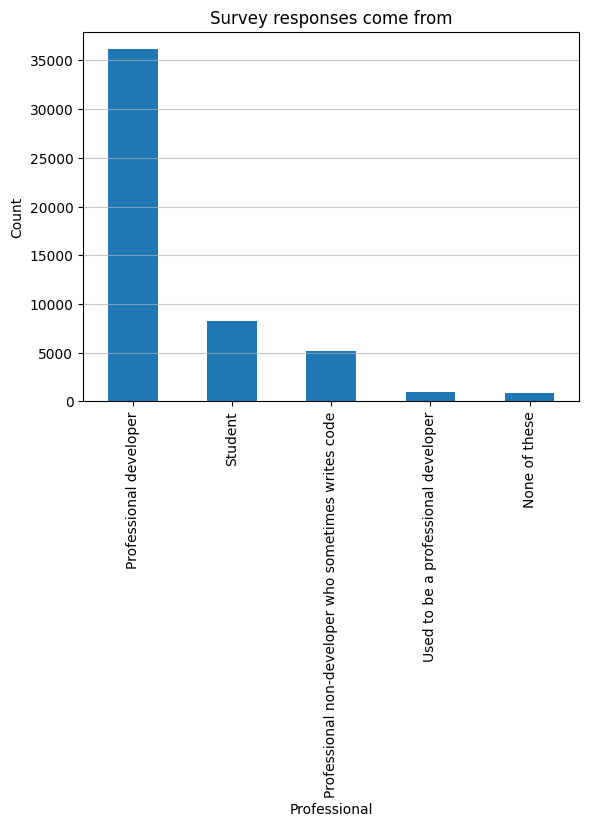

In [17]:
top_responders_profession = df['Professional'].value_counts()
top_responders_profession.plot(kind='bar')

plt.title('Survey responses come from')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

# Findings: Survey responses per Country
Great number of responses come from the biggest country, USA, and as there are 201 countries, number of responses is also not evenly distributed. To counter this we intend to only consider countries from Europe, and USA.

There are responses from 201 countries.


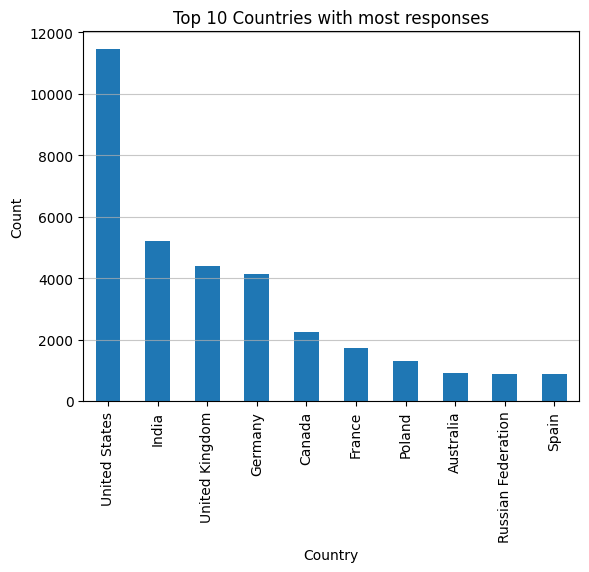

In [18]:
print(f"There are responses from {df['Country'].unique().shape[0]} countries.")

top_10_countries = df['Country'].value_counts().head(10)
top_10_countries.plot(kind='bar')

plt.title('Top 10 Countries with most responses')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

# Findings: Most worked in Programming languages
Surprising programming language that is used the most for work is JS, and for students it is Python. For students although the languages are the same, they are distributed different and the over all distribution seems more even, which might be because not all students know exactly what they want to do.

There are 36 languages taken under consideration.


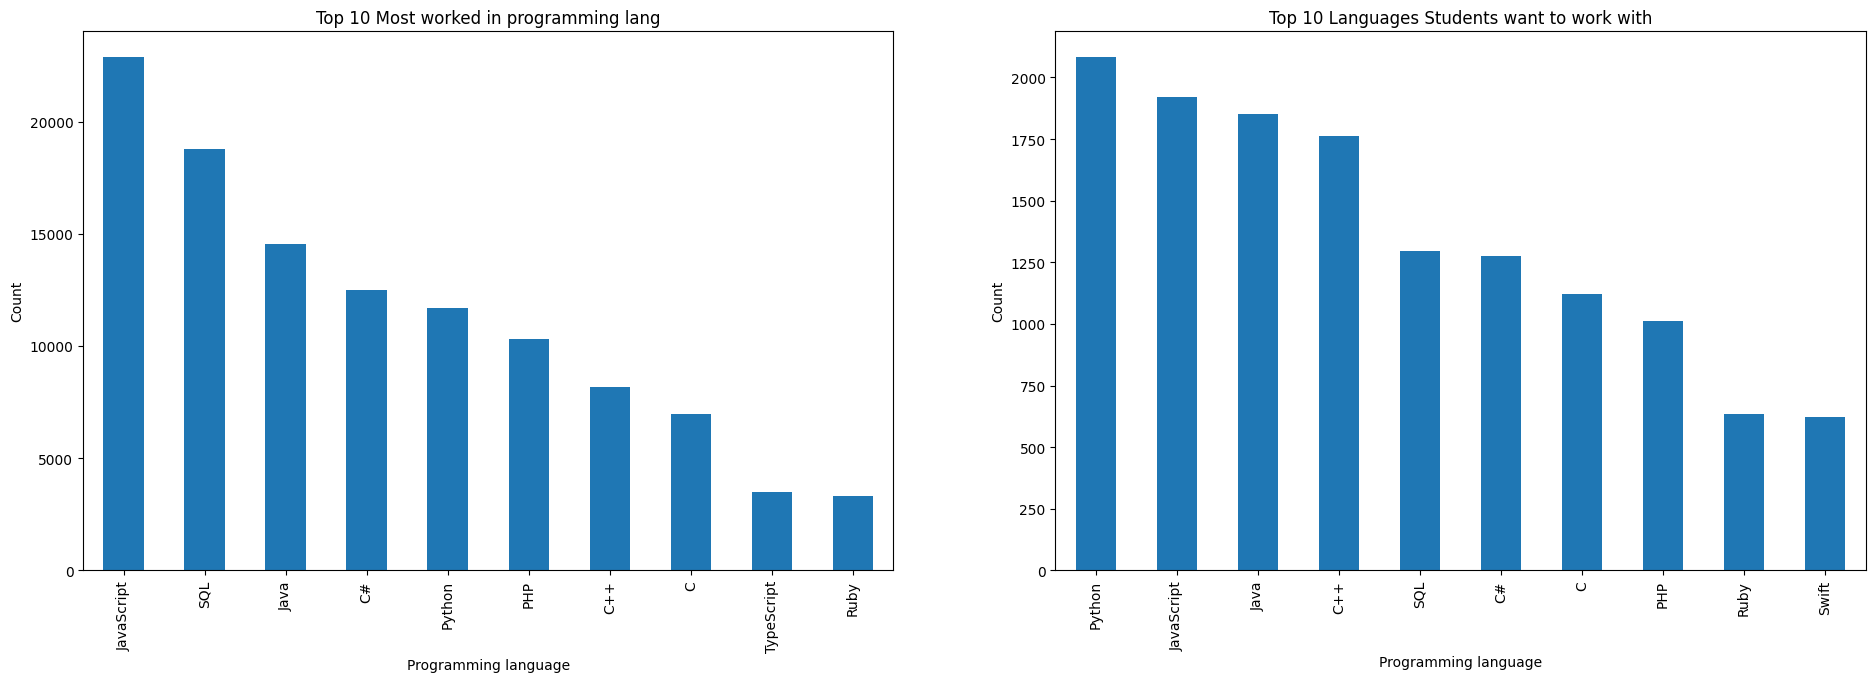

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))

df_exploded_worked_languages = df['HaveWorkedLanguage'].str.split('; ').explode()
print(f"There are {df_exploded_worked_languages.unique().shape[0]} languages taken under consideration.")

df['WantLanguage'] = df['WantWorkLanguage'].str.split('; ')
df_exploded_want_languages = df.explode('WantLanguage')
df_exploded_want_languages = df_exploded_want_languages[df_exploded_want_languages['Professional'] == 'Student']

top_10_languages_counts = df_exploded_worked_languages.value_counts().head(10)
top_10_languages_counts.plot(kind='bar', ax=axes[0])

axes[0].set_title('Top 10 Most worked in programming lang')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Programming language')

top_10_colledge_languages_counts = df_exploded_want_languages['WantLanguage'].value_counts().head(10)
top_10_colledge_languages_counts.plot(kind='bar', ax=axes[1])

axes[1].set_title('Top 10 Languages Students want to work with')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Programming language')

plt.show()

# Findings:  Job Satisfaction
The Distribution for Satisfaction Level for developers is left skewed, indicating that most developers ave satisfied with their job.

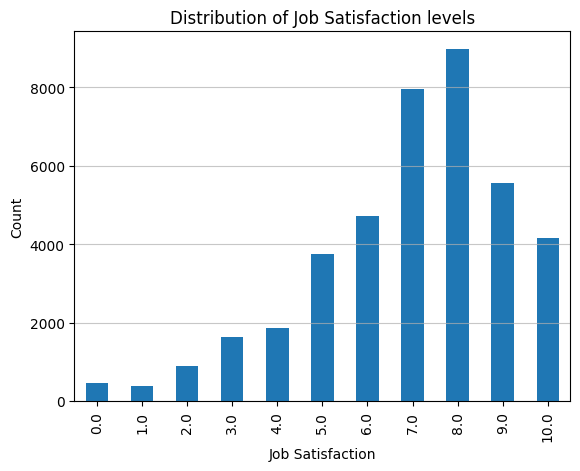

In [20]:
job_satisfaction = df['JobSatisfaction'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors='coerce'))
job_satisfaction.plot(kind='bar')

plt.title('Distribution of Job Satisfaction levels')
plt.ylabel('Count')
plt.xlabel('Job Satisfaction')

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

# Findings: Salary
Typical salary distribution that is right skewed, however with a lot of weird data at the beginning.

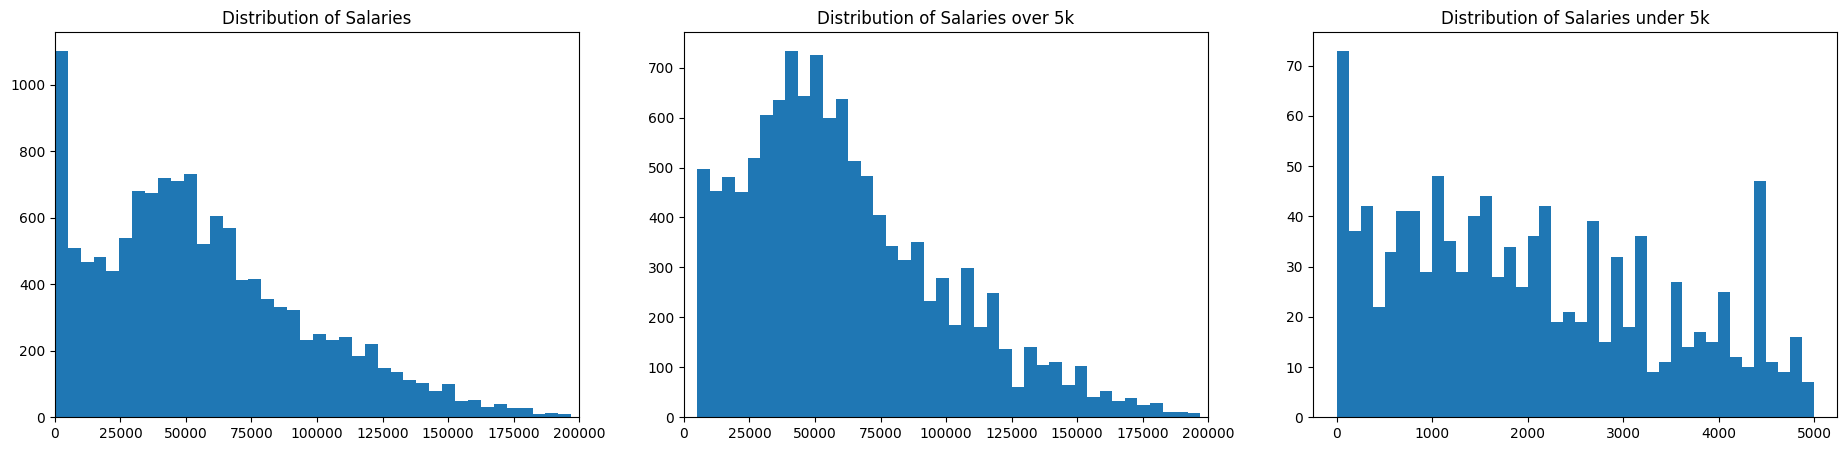

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 5))

axes[0].hist(df['Salary'], bins=40)
axes[0].set_title('Distribution of Salaries')
axes[0].set_xlim(0, 200_000)

axes[1].hist(df[df['Salary'] > 5_000]['Salary'], bins=40)
axes[1].set_title('Distribution of Salaries over 5k')
axes[1].set_xlim(0, 200_000)

axes[2].hist(df[df['Salary'] < 5_000]['Salary'], bins=40)
axes[2].set_title('Distribution of Salaries under 5k')

# plt.hist(df[df['Salary'] > 10000]['Salary'], bins=40)

# plt.title('Distribution of Salary over 10k')
# plt.ylabel('Count')
# plt.xlabel('Salary')
# 
# plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

# Findings: Salary with respect to language worked in
For salary the distribution seem to be even, with not a lot of differences by top programming languages, what is surprising that none of the most popular programming langugaes are in the top 10 paid languages. The closes one is Ruby. And here JS is in the middle, so the most popular languages are used by the most of the people however it also seems to lower their value.

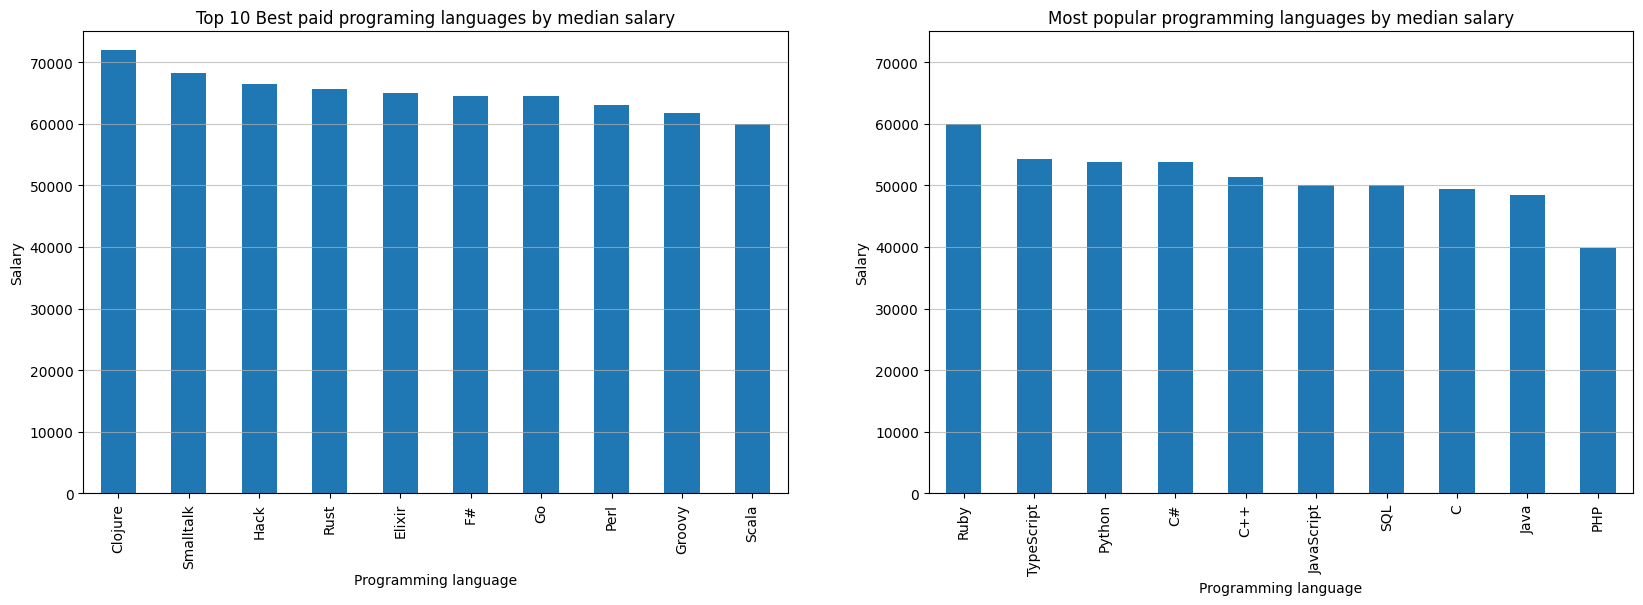

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

df['WorkedLanguages'] = df['HaveWorkedLanguage'].str.split('; ')
best_paid_lang = df.explode('WorkedLanguages').groupby('WorkedLanguages')['Salary'].median().sort_values(ascending=False)
best_paid_lang.head(10).plot(kind='bar', ax=axes[0])

axes[0].set_title('Top 10 Best paid programing languages by median salary')
axes[0].set_ylabel('Salary')
axes[0].set_ylim(0, 75000)
axes[0].set_xlabel('Programming language')
axes[0].grid(axis='y', linestyle='-', alpha=0.7)

paid_popular_languages = df.explode('WorkedLanguages')
paid_popular_languages = paid_popular_languages[paid_popular_languages['WorkedLanguages'].isin(list(top_10_languages_counts.keys()))]
paid_popular_languages = paid_popular_languages.groupby('WorkedLanguages')['Salary'].median().sort_values(ascending=False)
paid_popular_languages.plot(kind='bar', ax=axes[1])

axes[1].set_title('Most popular programming languages by median salary')
axes[1].set_ylabel('Salary')
axes[1].set_ylim(0, 75000)
axes[1].set_xlabel('Programming language')
axes[1].grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

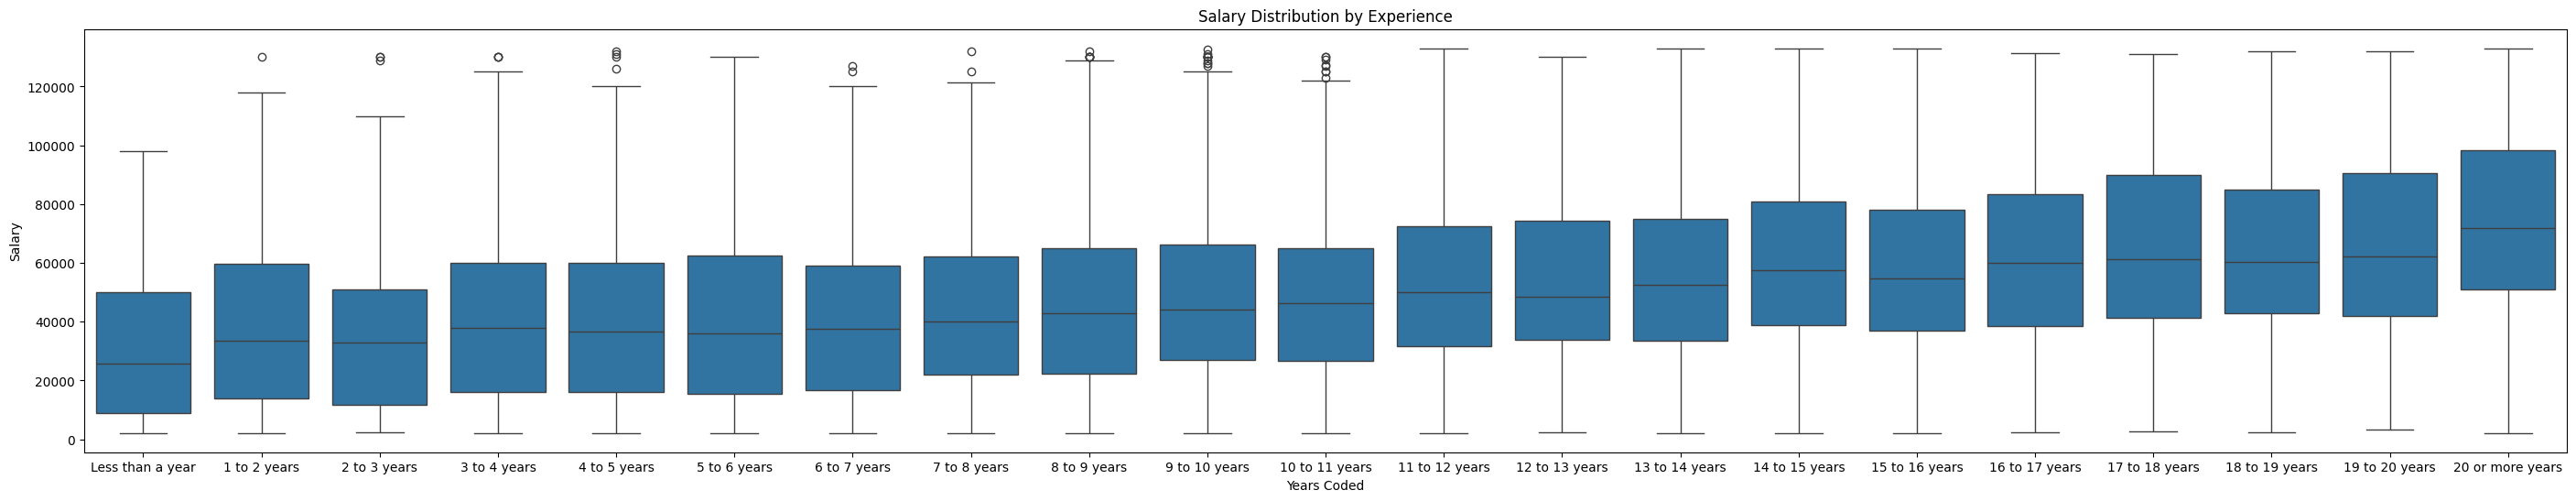

In [36]:
df_clean = df[['Salary', 'YearsProgram']].dropna()
df_clean = df_clean.dropna(subset=['Salary'])

q_low = df_clean['Salary'].quantile(0.05)
q_high = df_clean['Salary'].quantile(0.95)
df_filtered = df_clean[(df_clean['Salary'] >= q_low) & (df_clean['Salary'] <= q_high)]

x_order = ['Less than a year', '1 to 2 years', '2 to 3 years', '3 to 4 years', '4 to 5 years', '5 to 6 years', '6 to 7 years', '7 to 8 years', '8 to 9 years', '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', '13 to 14 years', '14 to 15 years', '15 to 16 years', '16 to 17 years', '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years']

plt.figure(figsize=(35, 6))
sns.boxplot(x='YearsProgram', y='Salary', data=df_filtered, order=x_order)
plt.title('Salary Distribution by Experience')
plt.xlabel('Years Coded')
plt.ylabel('Salary')
plt.show()

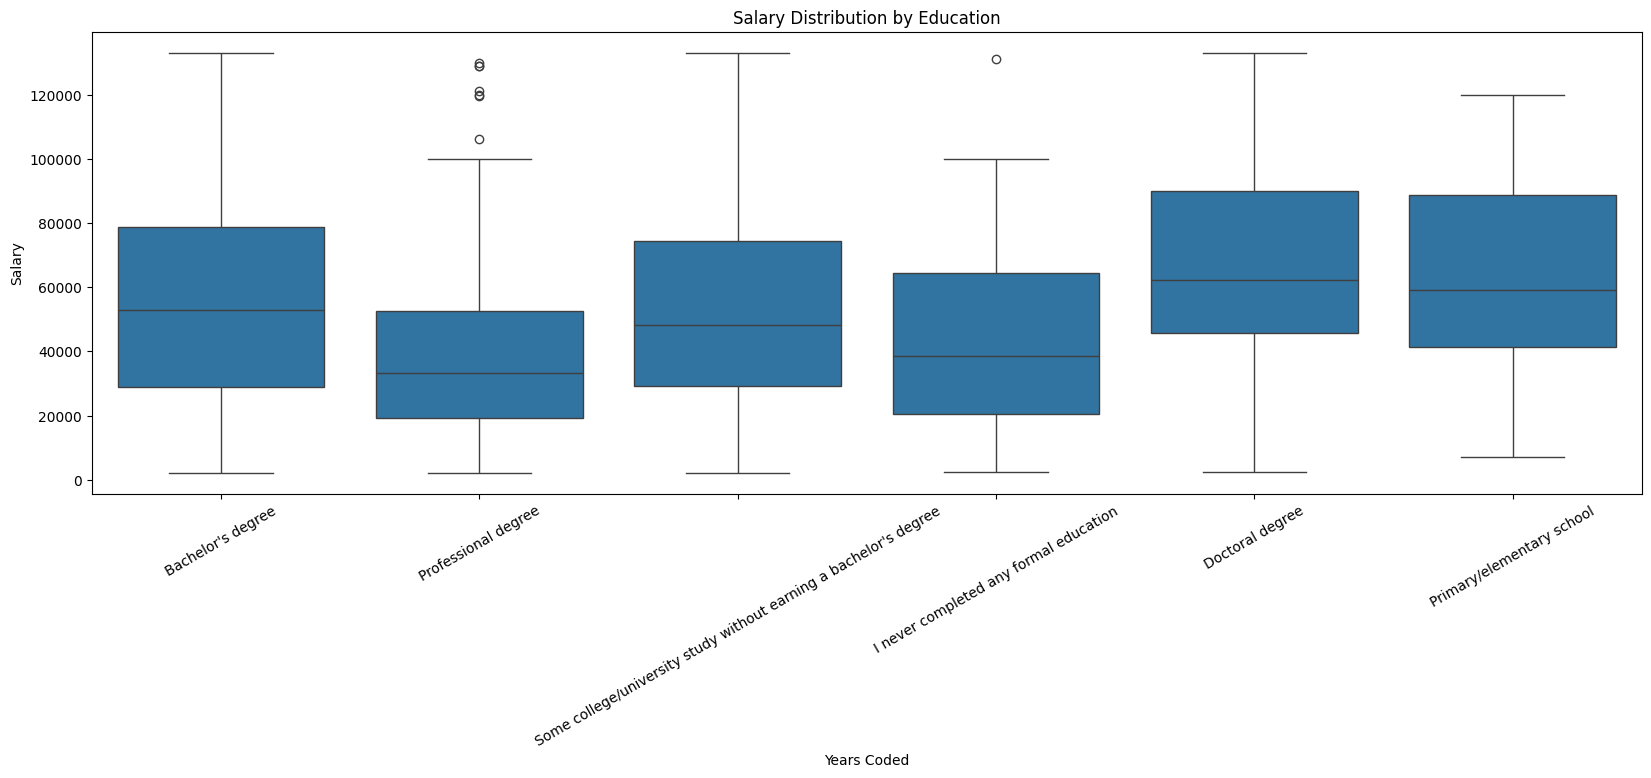

In [55]:
column = 'FormalEducation'
df_clean = df[['Salary', column]].dropna()
df_clean = df_clean.dropna(subset=['Salary'])

q_low = df_clean['Salary'].quantile(0.05)
q_high = df_clean['Salary'].quantile(0.95)
df_filtered = df_clean[(df_clean['Salary'] >= q_low) & (df_clean['Salary'] <= q_high)]
df_filtered = df_filtered[df_filtered[column].isin(["Bachelor's degree", 'Professional degree', "Some college/university study without earning a bachelor's degree", "Master's degree" 'Secondary school', 'I never completed any formal education', 'Doctoral degree', 'Primary/elementary school'])]
# print(df_filtered[column].unique())

plt.figure(figsize=(20, 6))
sns.boxplot(x=column, y='Salary', data=df_filtered)
plt.title('Salary Distribution by Education')
plt.xlabel('Years Coded')
plt.xticks(rotation=30)
plt.ylabel('Salary')
plt.show()

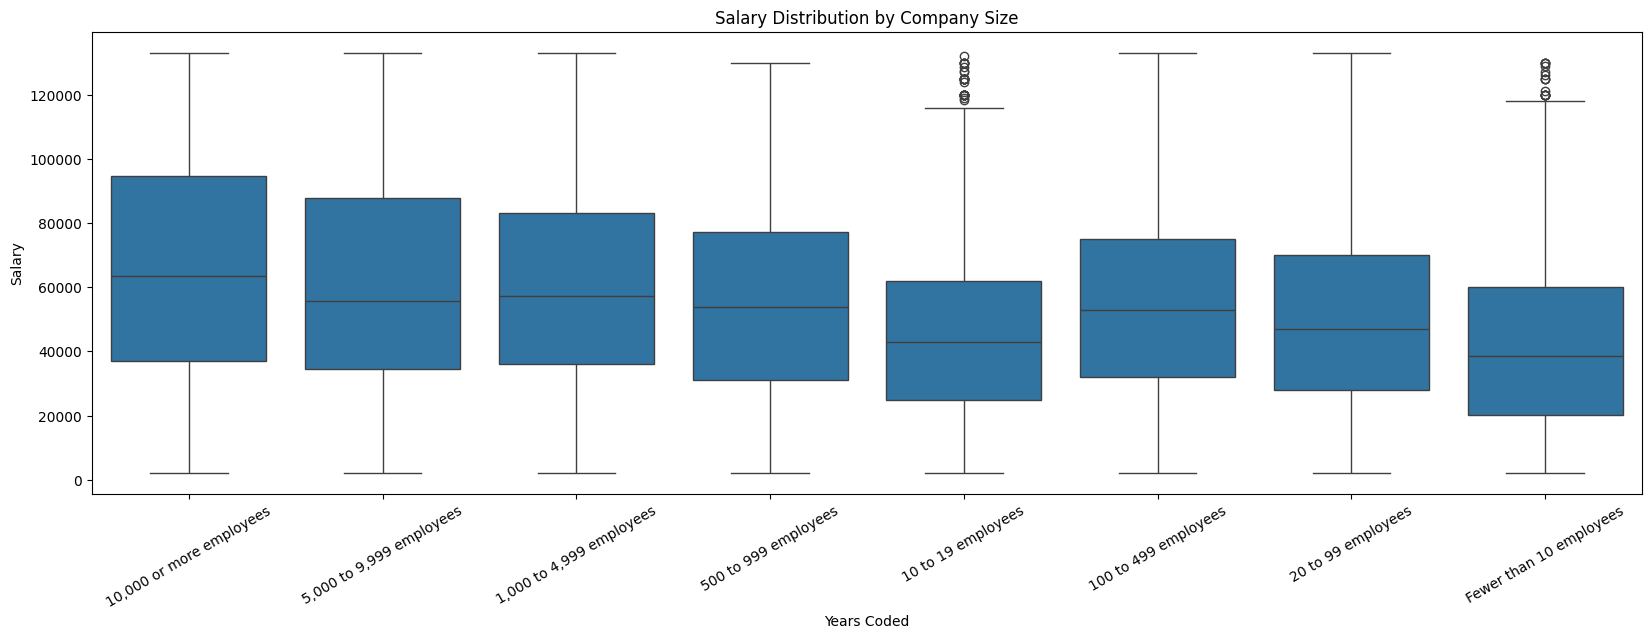

In [54]:
column = 'CompanySize'
df_clean = df[['Salary', column]].dropna()
df_clean = df_clean.dropna(subset=['Salary'])

q_low = df_clean['Salary'].quantile(0.05)
q_high = df_clean['Salary'].quantile(0.95)
df_filtered = df_clean[(df_clean['Salary'] >= q_low) & (df_clean['Salary'] <= q_high)]
df_filtered = df_filtered[df_filtered[column].isin(['10,000 or more employees', '5,000 to 9,999 employees', '1,000 to 4,999 employees', '500 to 999 employees', '10 to 19 employees', '100 to 499 employees', '20 to 99 employees', 'Fewer than 10 employees'])]
# print(df_filtered[column].unique())

plt.figure(figsize=(20, 6))
sns.boxplot(x=column, y='Salary', data=df_filtered)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Years Coded')
plt.xticks(rotation=30)
plt.ylabel('Salary')
plt.show()

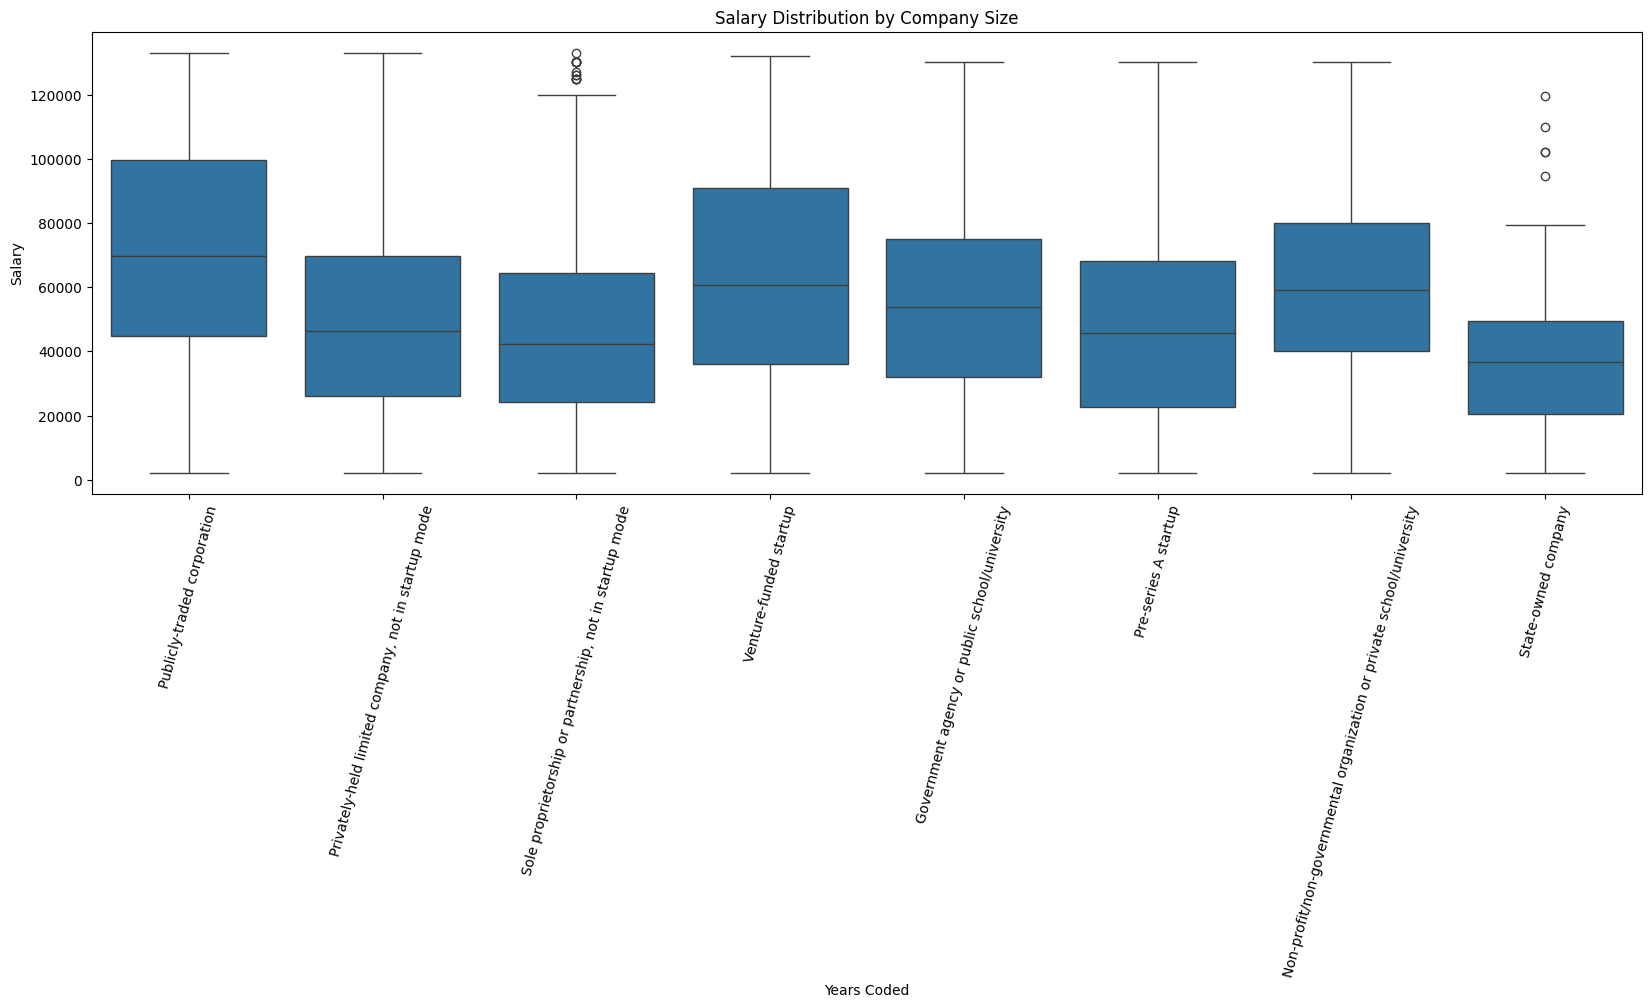

In [66]:
column = 'CompanyType'
df_clean = df[['Salary', column]].dropna()
df_clean = df_clean.dropna(subset=['Salary'])

q_low = df_clean['Salary'].quantile(0.05)
q_high = df_clean['Salary'].quantile(0.95)
df_filtered = df_clean[(df_clean['Salary'] >= q_low) & (df_clean['Salary'] <= q_high)]
df_filtered = df_filtered[df_filtered[column].isin(['Publicly-traded corporation', 'Privately-held limited company, not in startup mode', 'Venture-funded startup', 'State-owned company', 'Pre-series A startup', 'Non-profit/non-governmental organization or private school/university', 'Government agency or public school/university', 'Sole proprietorship or partnership, not in startup mode'])]
# print(df_filtered[column].unique())

plt.figure(figsize=(20, 6))
sns.boxplot(x=column, y='Salary', data=df_filtered)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Years Coded')
plt.xticks(rotation=75)
plt.ylabel('Salary')
plt.show()